In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from ast import literal_eval
from collections import defaultdict
%matplotlib inline
import random
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('D:/FinalDataset.csv')

In [3]:
data = data[['Product', 'Brand', 'Decription', 'Price', 'Seller','Buyer_FeedBack', 'Packaging_Rating', 'Courier_Rating','Product_Rating']]

In [4]:
Product = 'Fleejost HD Video/Audio Hidden Recording, HD Sound Clarity Pen Camera with Memory Card Inserting Facility'
df = data.loc[data['Product'] == Product]
df = df[['Seller', 'Price','Buyer_FeedBack', 'Packaging_Rating', 'Courier_Rating','Product_Rating']]

avg_price = pd.DataFrame(df.groupby('Seller')['Price'].mean().sort_values()).reset_index()
avg_rating_count = pd.DataFrame(df.groupby('Seller')['Buyer_FeedBack'].count().sort_values(ascending=False)).reset_index()
avg_buyer_feedback = pd.DataFrame(df.groupby('Seller')['Buyer_FeedBack'].mean().sort_values(ascending=False)).reset_index()
avg_courier_rating = pd.DataFrame(df.groupby('Seller')['Courier_Rating'].mean().sort_values()).reset_index()
avg_product_rating = pd.DataFrame(df.groupby('Seller')['Product_Rating'].mean().sort_values()).reset_index()
avg_packaging_rating = pd.DataFrame(df.groupby('Seller')['Packaging_Rating'].mean().sort_values()).reset_index()

new_Frame1 = pd.merge(avg_rating_count,avg_buyer_feedback,on='Seller', how='outer')
new_Frame2 = pd.merge(avg_courier_rating,avg_product_rating,on='Seller', how='outer')
new_Frame3 = pd.merge(avg_price,avg_packaging_rating,on='Seller', how='outer')

d1 = pd.merge(new_Frame1,new_Frame2,on='Seller', how='outer')
dataSet = pd.merge(d1,new_Frame3,on='Seller', how='outer')
dataSet = dataSet.rename(columns = {'Buyer_FeedBack_x':'Count','Buyer_FeedBack_y':'Buyer_FeedBack'})
dataSet.columns

Index(['Seller', 'Count', 'Buyer_FeedBack', 'Courier_Rating', 'Product_Rating',
       'Price', 'Packaging_Rating'],
      dtype='object')

In [5]:
#SCALING DATA TO SCORE(0-5) 
from sklearn.preprocessing import MinMaxScaler
data = dataSet[['Price','Count','Buyer_FeedBack','Courier_Rating','Product_Rating','Packaging_Rating']]
scaler = MinMaxScaler(feature_range=(0, 5))
scaler.fit(data)
df = pd.DataFrame(scaler.transform(data))
df[0] = 5  - df[0]

C:\Users\Rahlsesite\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [6]:
corr = df.corr()

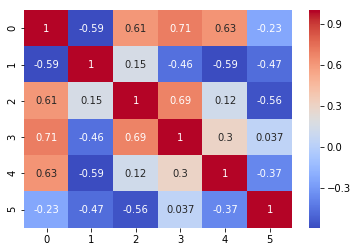

In [7]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Price Correlation            : corr[0]
# Count Correlation            : corr[1]
# Buyer_FeedBack Correlation   : corr[2]
# Courier_Rating Correlation   : corr[3]
# Product_Rating Correlation   : corr[4]
# Packaging_Rating Correlation : corr[5]


In [8]:
lis = ['Price','Count','Buyer_FeedBack','Courier_Rating','Product_Rating','Packaging_Rating']
corr = df.corr()

for i in np.arange(0,6):
    sr = lis[i]+'_Score'
    corrList = corr[i]
    dataSet[sr] = (corrList[0]*df[0]) + (corrList[1]*df[1]) + (corrList[2]*df[2]) + (corrList[3]*df[3]) +(corrList[4]*df[4]) + (corrList[5]*df[5])

In [9]:
srp = dataSet.sort_values(by='Courier_Rating_Score',ascending=False).head(1)['Seller'].astype(str)


In [10]:
def FindBestSellers(Prod,data):
    df = data.loc[data['Product'] == Prod]
    df = df[['Seller', 'Price','Buyer_FeedBack', 'Packaging_Rating', 'Courier_Rating','Product_Rating']]

    avg_price = pd.DataFrame(df.groupby('Seller')['Price'].mean().sort_values()).reset_index()
    avg_rating_count = pd.DataFrame(df.groupby('Seller')['Buyer_FeedBack'].count().sort_values(ascending=False)).reset_index()
    avg_buyer_feedback = pd.DataFrame(df.groupby('Seller')['Buyer_FeedBack'].mean().sort_values(ascending=False)).reset_index()
    avg_courier_rating = pd.DataFrame(df.groupby('Seller')['Courier_Rating'].mean().sort_values()).reset_index()
    avg_product_rating = pd.DataFrame(df.groupby('Seller')['Product_Rating'].mean().sort_values()).reset_index()
    avg_packaging_rating = pd.DataFrame(df.groupby('Seller')['Packaging_Rating'].mean().sort_values()).reset_index()

    new_Frame1 = pd.merge(avg_rating_count,avg_buyer_feedback,on='Seller', how='outer')
    new_Frame2 = pd.merge(avg_courier_rating,avg_product_rating,on='Seller', how='outer')
    new_Frame3 = pd.merge(avg_price,avg_packaging_rating,on='Seller', how='outer')

    d1 = pd.merge(new_Frame1,new_Frame2,on='Seller', how='outer')
    dataSet = pd.merge(d1,new_Frame3,on='Seller', how='outer')

    dataSet = dataSet.rename(columns = {'Buyer_FeedBack_x':'Count','Buyer_FeedBack_y':'Buyer_FeedBack'})
    
    data = dataSet[['Price','Count','Buyer_FeedBack','Courier_Rating','Product_Rating','Packaging_Rating']]
    scaler = MinMaxScaler(feature_range=(0, 5))
    scaler.fit(data)
    df = pd.DataFrame(scaler.transform(data))
    df[0] = 5  - df[0]
    
    lis = ['Price','Count','Buyer_FeedBack','Courier_Rating','Product_Rating','Packaging_Rating']
    corr = df.corr()
    for i in np.arange(0,6):
        sr = lis[i]+'_Score'
        corrList = corr[i]
        dataSet[sr] = (corrList[0]*df[0]) + (corrList[1]*df[1]) + (corrList[2]*df[2]) + (corrList[3]*df[3]) +(corrList[4]*df[4]) + (corrList[5]*df[5])
    
    PS = dataSet.sort_values(by='Price_Score',ascending=False).head(1)['Seller'].astype(str)
    CS = dataSet.sort_values(by='Count_Score',ascending=False).head(1)['Seller'].astype(str)
    BFS = dataSet.sort_values(by='Buyer_FeedBack_Score',ascending=False).head(1)['Seller'].astype(str)
    CRS = dataSet.sort_values(by='Courier_Rating_Score',ascending=False).head(1)['Seller'].astype(str)
    PRS = dataSet.sort_values(by='Product_Rating_Score',ascending=False).head(1)['Seller'].astype(str)
    PARS = dataSet.sort_values(by='Packaging_Rating_Score',ascending=False).head(1)['Seller'].astype(str)
      
    dataSet['ALLS'] = df[0] + df[1] + df[2] + df[3] + df[4] +df[5]
    ALLS = dataSet.sort_values(by='ALLS',ascending=False).head(1)['Seller'].astype(str)
    
    drp = {}
    drp['Product'] = Prod
    drp['Price'] = PS
    drp['Count'] = CS
    drp['Buyer_FeedBack'] = BFS
    drp['Courier_Rating'] = CRS
    drp['Product_Rating'] = PRS
    drp['Packaging_Rating'] = PARS
    drp['ALL OVER'] = ALLS
    
    return drp

In [12]:
Pr = 'Voltas 1 Ton 3 Star Split AC (Copper, 123 CZA, White)'
dataf = pd.read_csv('D:/FinalDataset.csv')
drrt = FindBestSellers(Pr,dataf)
df = pd.DataFrame(drrt)
df.fillna(value='HELLO',inplace=True)
drro = df.replace('HELLO','').groupby('Product',as_index=False).agg(''.join)


C:\Users\Rahlsesite\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [425]:
dataf = pd.read_csv('D:/FinalDataset.csv')
dr = pd.unique(dataf['Product'])
fadr = pd.DataFrame()
for item in dr:
    drrt = FindBestSellers(item,dataf)
    df = pd.DataFrame(drrt)
    df.fillna(value='HELLO',inplace=True)
    drrp = pd.DataFrame(df.replace('HELLO','').groupby('Product',as_index=False).agg(''.join))
    drro =  pd.concat([drro,drrp],axis=0)

C:\Users\Rahlsesite\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Rahlsesite\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Rahlsesite\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Rahlsesite\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Rahlsesite\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data w

In [432]:
drro.columns

Index(['level_0', 'index', 'Product', 'Price', 'Count', 'Buyer_FeedBack',
       'Courier_Rating', 'Product_Rating', 'Packaging_Rating', 'ALL OVER'],
      dtype='object')

In [433]:
dataFrame = drro[['Product', 'Price', 'Count', 'Buyer_FeedBack','Courier_Rating', 'Product_Rating', 'Packaging_Rating', 'ALL OVER']]

In [436]:
dataFrame.to_csv('D:/BestSellers.csv')

In [1]:
dataFrame.head()

NameError: name 'dataFrame' is not defined